In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/clean_biometric_data.csv")
df.head()


/tmp/ipykernel_12243/3199654727.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/clean_biometric_data.csv")


,date,state,district,pincode,bio_age_5_17,bio_age_17_plus,year,month,bio_total
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025.0,1.0,857
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025.0,1.0,513
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025.0,1.0,1734
3,2025-01-03,Bihar,Bhojpur,802158,256,980,2025.0,1.0,1236
4,2025-01-03,Tamil Nadu,Madurai,625514,271,815,2025.0,1.0,1086


In [5]:
#top 10 states by biometric usage
import pandas as pd

df = pd.read_csv("data/clean_biometric_data.csv")

state_usage = (
    df.groupby("state")["bio_total"]
    .sum()
    .sort_values(ascending=False)
)

state_usage.head(10)

age_totals = df[["bio_age_5_17", "bio_age_17_plus"]].sum()
age_totals



/tmp/ipykernel_12243/1744499360.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/clean_biometric_data.csv")


bio_age_5_17       34226855
bio_age_17_plus    35536240
dtype: int64

<Axes: title={'center': 'Age-wise Biometric Updates'}, xlabel='Age Group', ylabel='Number of Updates'>

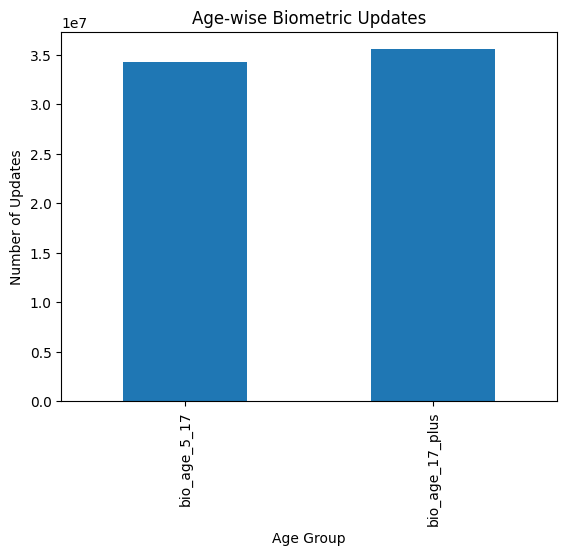

In [6]:
age_totals.plot(
    kind="bar",
    title="Age-wise Biometric Updates",
    ylabel="Number of Updates",
    xlabel="Age Group"
)


In [7]:
# now the age aggeragation of groups
monthly_transition = (
    df.groupby(["year", "month"])[["bio_age_5_17", "bio_age_17_plus"]]
    .sum()
    .reset_index()
)

monthly_transition.head()


,year,month,bio_age_5_17,bio_age_17_plus
0,2025.0,1.0,20827015,22937341
1,2025.0,2.0,666600,593410
2,2025.0,3.0,563950,576240
3,2025.0,4.0,512443,526938
4,2025.0,5.0,389715,428201


<Axes: title={'center': 'Monthly Biometric Transition (5–17 to 18+)'}, xlabel='Month', ylabel='Number of Updates'>

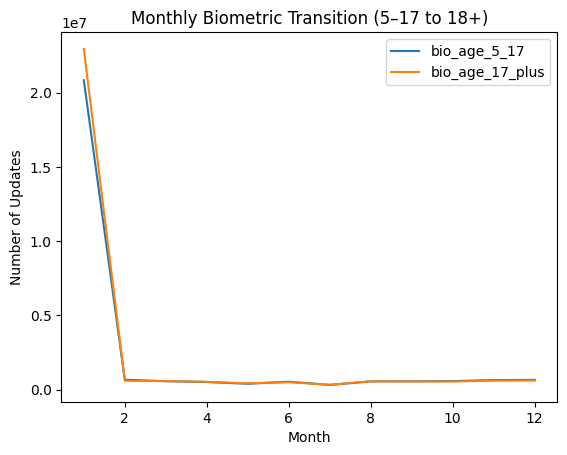

In [8]:
monthly_transition.plot(
    x="month",
    y=["bio_age_5_17", "bio_age_17_plus"],
    kind="line",
    title="Monthly Biometric Transition (5–17 to 18+)",
    xlabel="Month",
    ylabel="Number of Updates"
)


In [9]:
#state wise biometric update comparision
top_states = state_usage.head(10)
top_states


state
Uttar Pradesh     9577735
Maharashtra       9226139
Madhya Pradesh    5923771
Bihar             4897587
Tamil Nadu        4698117
Rajasthan         3994955
Andhra Pradesh    3714592
Gujarat           3196514
Chhattisgarh      2648729
Karnataka         2635954
Name: bio_total, dtype: int64

<Axes: title={'center': 'Top 10 States by Biometric Updates'}, xlabel='State', ylabel='Number of Updates'>

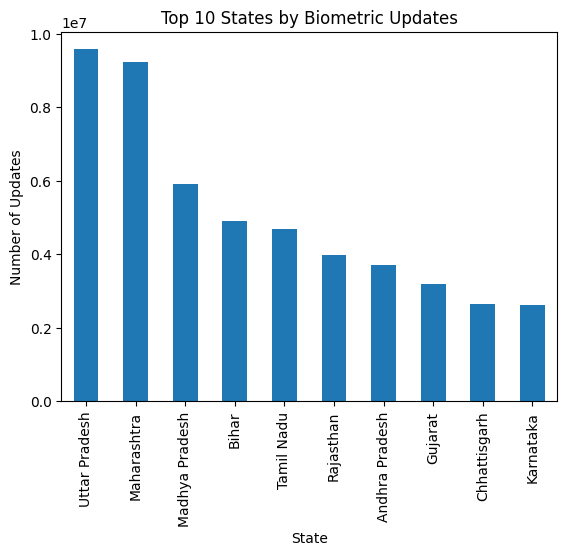

In [10]:
top_states.plot(
    kind="bar",
    title="Top 10 States by Biometric Updates",
    xlabel="State",
    ylabel="Number of Updates"
)


In [11]:
df["month"] = pd.to_datetime(df["date"]).dt.month
df["month"].head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: month, dtype: float64

In [12]:
monthly_usage = (
    df.groupby("month")["bio_total"]
    .sum()
    .sort_index()
)

monthly_usage


month
1.0     43764356
2.0      1260010
3.0      1140190
4.0      1039381
5.0       817916
6.0      1034040
7.0       637600
8.0      1112415
9.0      1107558
10.0     1114786
11.0     1252343
12.0     1265698
Name: bio_total, dtype: int64

<Axes: title={'center': 'Month-wise Biometric Update Trend'}, xlabel='Month', ylabel='Number of Updates'>

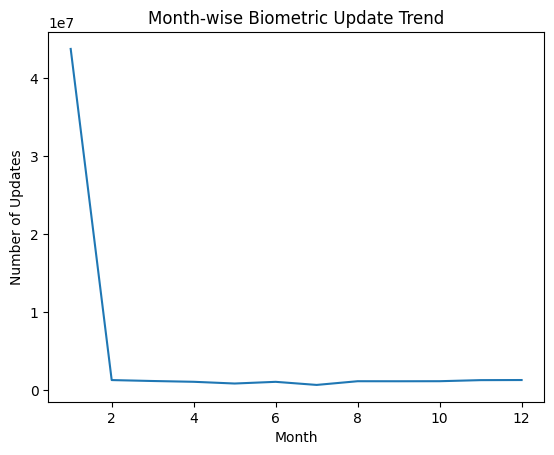

In [13]:
monthly_usage.plot(
    kind="line",
    title="Month-wise Biometric Update Trend",
    xlabel="Month",
    ylabel="Number of Updates"
)


In [14]:
# District-wise biometric usage
district_usage = (
    df.groupby(["state", "district"])["bio_total"]
    .sum()
    .sort_values(ascending=False)
)

district_usage.head(10)


state           district  
Maharashtra     Pune          605762
                Nashik        576606
                Thane         571273
                Jalgaon       417384
Gujarat         Ahmedabad     405490
Maharashtra     Mumbai        404359
                Ahmadnagar    363561
Rajasthan       Jaipur        355884
Maharashtra     Nagpur        350923
Andhra Pradesh  Kurnool       350633
Name: bio_total, dtype: int64

<Axes: title={'center': 'Top 10 Districts by Biometric Updates'}, xlabel='State, District', ylabel='Number of Updates'>

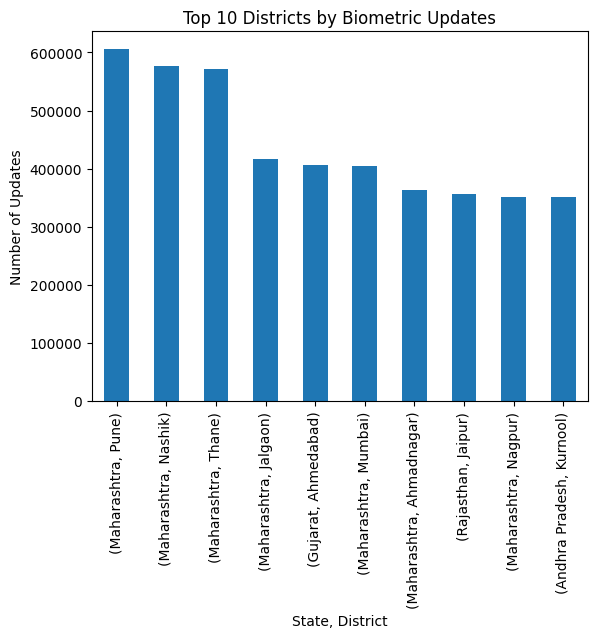

In [15]:
top_districts = district_usage.head(10)

top_districts.plot(
    kind="bar",
    title="Top 10 Districts by Biometric Updates",
    xlabel="State, District",
    ylabel="Number of Updates"
)


In [18]:
#Now comes the anomalies detection at the district level and the graph of it's
district_df = district_usage.reset_index()
district_df.columns = ["state", "district", "bio_total"]

from scipy.stats import zscore

district_df["z_score"] = zscore(district_df["bio_total"])

anomalies = district_df[district_df["z_score"].abs() > 3]
anomalies


,state,district,bio_total,z_score
0,Maharashtra,Pune,605762,6.865467
1,Maharashtra,Nashik,576606,6.495252
2,Maharashtra,Thane,571273,6.427535
3,Maharashtra,Jalgaon,417384,4.473494
4,Gujarat,Ahmedabad,405490,4.322467
5,Maharashtra,Mumbai,404359,4.308106
6,Maharashtra,Ahmadnagar,363561,3.790064
7,Rajasthan,Jaipur,355884,3.692583
8,Maharashtra,Nagpur,350923,3.629590
9,Andhra Pradesh,Kurnool,350633,3.625907


<Axes: title={'center': 'District-level Anomaly Detection'}, xlabel='bio_total', ylabel='z_score'>

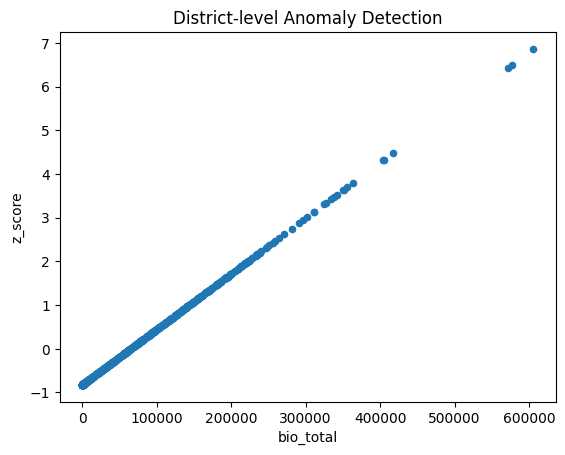

In [20]:
district_df.plot(
    kind="scatter",
    x="bio_total",
    y="z_score",
    title="District-level Anomaly Detection",
)
